In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly
#import cufflinks

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [10]:
df=pd.read_csv('creditcard.csv')

In [11]:
df.info    ####To get an overview of our complete dataset

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [12]:
df.describe()   ###To get an overview of range and values of our features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
df[:2]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [14]:
sns.set(color_codes=True)

In [15]:
df.isnull().sum()   ####No null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

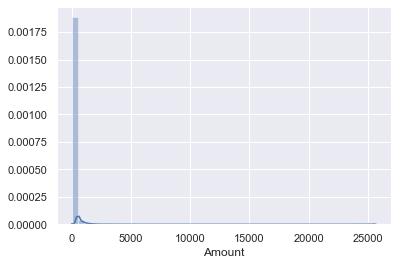

In [16]:
sns.distplot(df['Amount'])    ###Majority of transactions are of low denominations and very few are close to the maxm amount of transaction(i.e 25691.16units)

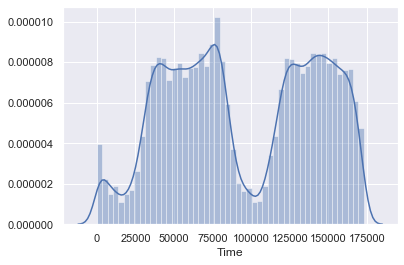

In [17]:
##Time measured in seconds is the time elapsed between two succesive transactions
##Time(max)=172792sec=approx 2 days i.e this data is for transactions carried within 2 consecutive days
sns.distplot(df['Time']) ##Bimodal distribution of time with a drop in between indicates that after around 100000sec(approx 28hrs) 
                        ##there was significant drop in no. of transactions and further rise later, this might be assumed that drop occured due to 
                        ##decrease in no. of transactions at night

In [18]:
[df['Class'][df['Class']==0].value_counts() , df['Class'][df['Class']==1].value_counts() ]
######Very few fraud transactions

[0    284315
 Name: Class, dtype: int64, 1    492
 Name: Class, dtype: int64]

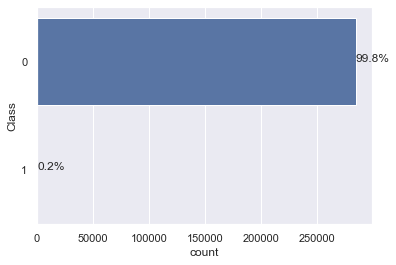

In [19]:
ax=sns.countplot(y=df['Class'],data=df)
total = len(df['Class'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()     ###Only 0.2% transactions are fraud indicating that dataset is highly imbalanced

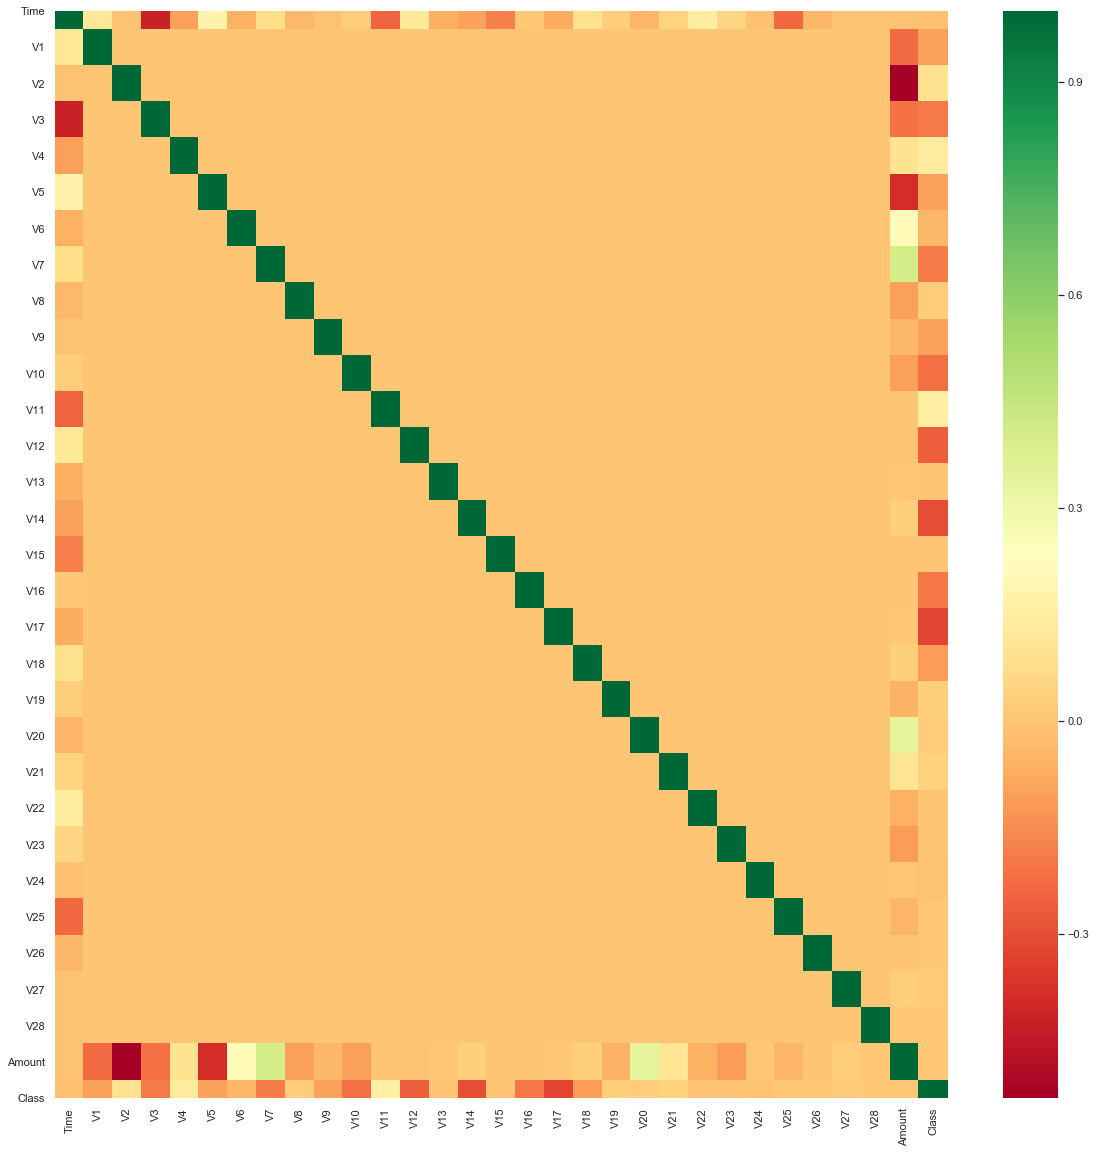

In [20]:
E = df.iloc[:,0:31]  #independent columns
f = df.iloc[:,-1]    #target column 
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=False,cmap="RdYlGn")   

###It is observed that due to PCA as the components are orthogonal to each other there's almost no correlation
##among themselves. But a few variables are seem to have +ve as well as -ve correlations with Class.

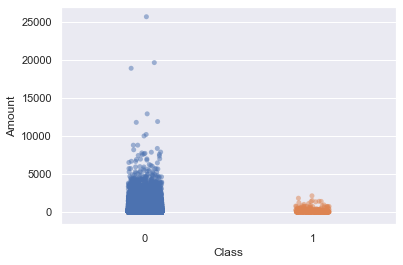

In [21]:
bplot=sns.stripplot(y='Amount', x='Class', data=df, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5)     

###We can say that fraudulent transactions are of lower denominations and higher valued transactions are non-fraud

In [22]:
df.corr()['Class'].sort_values()

####To make a separate list of highly correlated(+ve or -ve) features(with Class) and see their distributions later
###It is observed that V4 and V11 exhibit comparatively high +ve correlation with class
###V17,V14,V12,V10,V16 exhibit comparatively high -ve correlation with the class

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

In [23]:
df.var()  ###A feature with low variance would indicate that it has same value for all samples thus reducing its predictive power.
          ### We could set a threshold for variance and then remove the features below this threshold

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

In [24]:
####Drawing stacked distributions of highly correlated features(High correlation with Class) to get a notion of the range of variables over which fraud is predominant

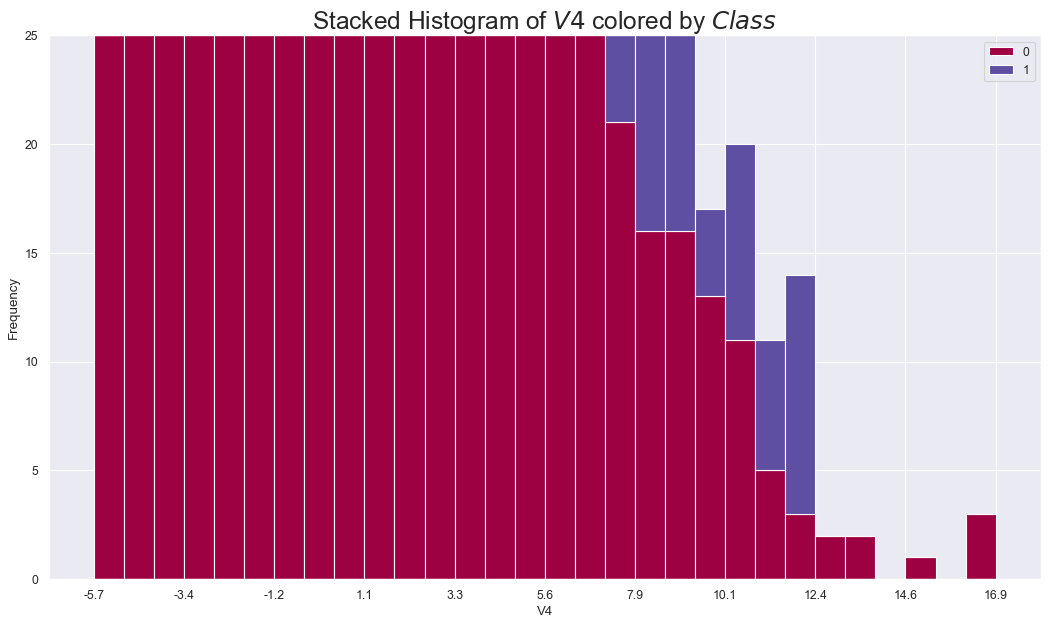

In [25]:
# Prepare data
x_var = 'V4'
groupby_var = 'Class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])   
plt.show()

###V4 from 7.9-12.4 are only prone to fraud

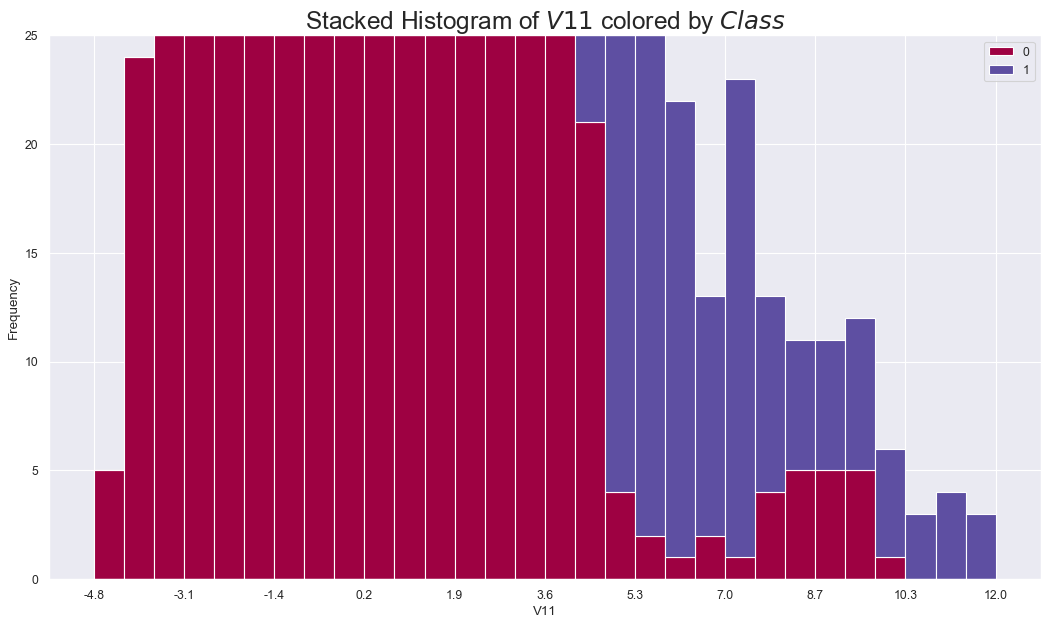

In [26]:
# Prepare data
x_var = 'V11'
groupby_var = 'Class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])   
plt.show()

###V4 from 7.9-12.4 are only prone to fraud

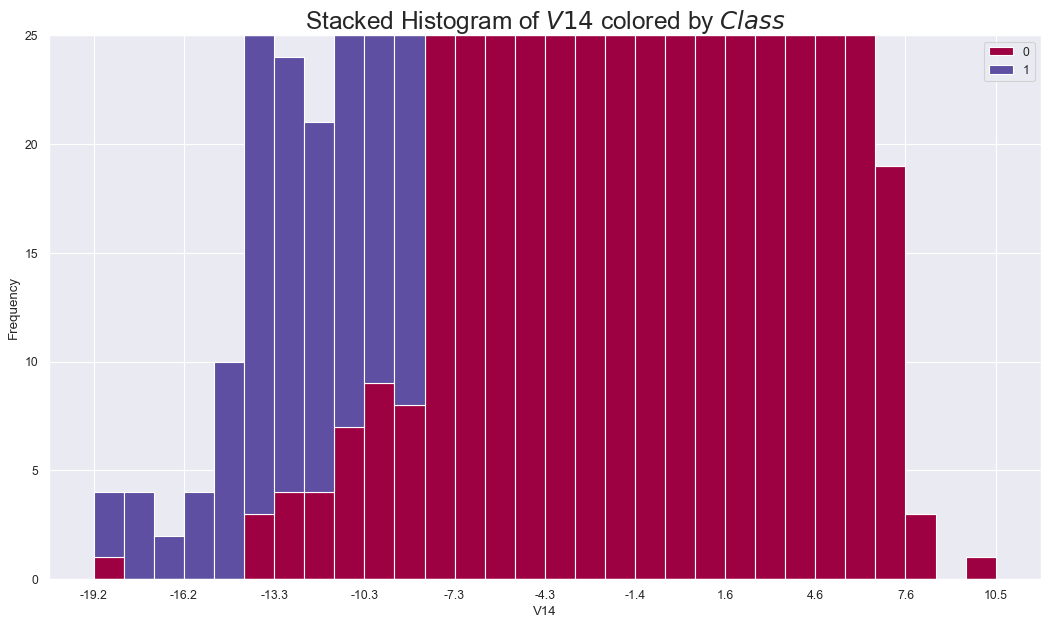

In [27]:
# Prepare data
x_var = 'V14'
groupby_var = 'Class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])   
plt.show()

###V4 from 7.9-12.4 are only prone to fraud

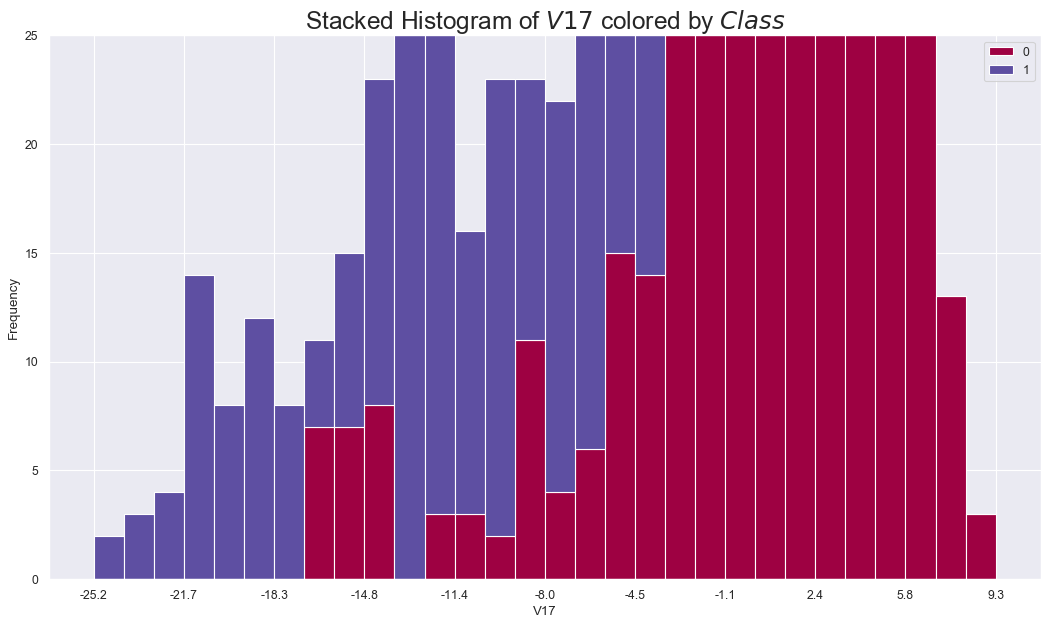

In [28]:
# Prepare data
x_var = 'V17'
groupby_var = 'Class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])   
plt.show()

###V4 from 7.9-12.4 are only prone to fraud

In [29]:
####The above stacked distribution could be performed over remaining highly correlated datasets too(they are V12,V11,V16,V3)

In [30]:
a=df['Amount'].groupby(df['Class'])
a.describe()

###Maximum fraud transaction is of 2125units and the mean fraud amount is 122units. 

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


In [31]:
###Distribution of the fraud transaction amount
c=df.loc[df['Class'] == 1, 'Amount']

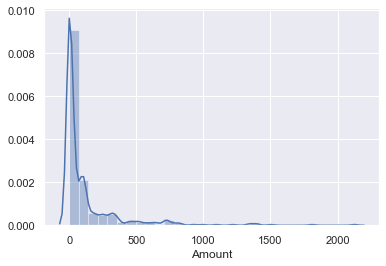

In [32]:
sns.distplot(c,bins=30)   ####From the rightskewed distribution of amount of fraud transaction we can 
                          ###clearly see that most of the fraud transactions are low/null valued
                         

In [33]:
####Box and Whiskers plot to check the outliers within our features.
####As it is observed that only a certain no. of features show comparatively good correlation with Class(target), so outlier detection is done for them first
###Depending upon number of outliers we could decide the threshold above which we've to remove the datapoints

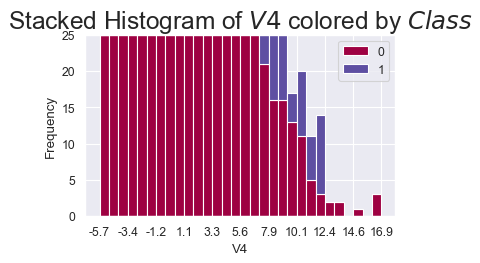

In [34]:
# Prepare data
x_var = 'V4'
groupby_var = 'Class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(5,3), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])   
plt.show()

###V4 from 7.9-12.4 are only prone to fraud


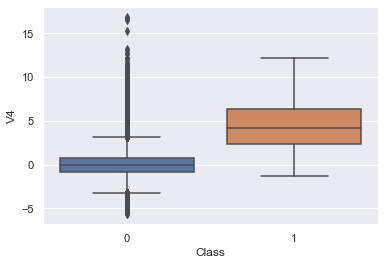

In [35]:
sns.boxplot('Class','V4',data=df)

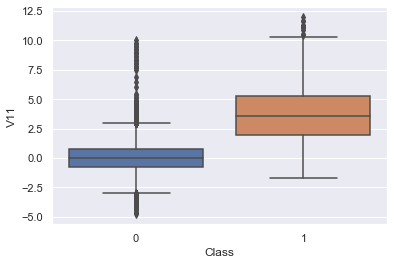

In [36]:
sns.boxplot('Class','V11',data=df)

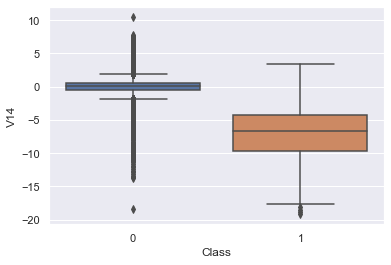

In [37]:
sns.boxplot('Class','V14',data=df)

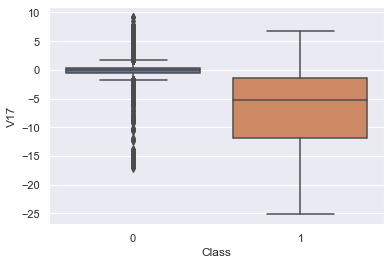

In [38]:
sns.boxplot('Class','V17',data=df)

In [39]:
local_df = df.copy(deep=True)

In [40]:
local_df['Time'][0:86401]='Day 1'
local_df['Time'][86401:284807]='Day 2'    ####To make two sets of Day 1 and Day 2 as per the time period


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
local_df.loc[local_df['Class'] == 1, 'Time'].value_counts()  

#####It is observed that more fraud transactions have occured on Day 2

Day 2    287
Day 1    205
Name: Time, dtype: int64

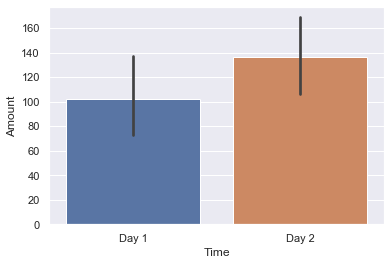

In [42]:
sns.barplot(x=local_df['Time'],y=c)  
###Here c is the fraud amount
###It is observed fraud of higher value/higher amount has occured on day 2
                       

In [43]:
from scipy import stats

In [44]:
mask=df["Class"]==1

In [45]:
df_frod=df[mask]
df_frod

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


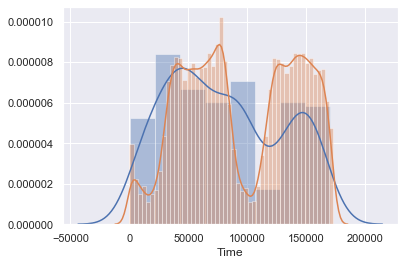

In [46]:
sns.distplot(df_frod['Time'])
sns.distplot(df['Time'])


In [47]:
###Preprocessing

In [48]:
a=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In [49]:
###Normalization being sensitive to outliers, it would lead to loss of significance of outliers in prediction process 
##so we'll prefer standardization( i.e making mean=0 and SD=1)

In [50]:
std_df=(df-df.mean())/df.std()  ###std_df is standardized dataframe
#std_df[:2]

In [51]:
####As this is a highly imbalanced dataset even though we apply algorithms and get high accuracy but that would be
##misleading, so we'll use sampling techniques to make the no. of samples of fraud & non-fraud transac as same
### Here under-sampling has been done but in further work I wish to apply SMOTE

In [52]:
###Data is sufficiently large so even if we take 10% of data as test set, it's suffice
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print((train.shape, test.shape))

((256169, 31), (28638, 31))


In [53]:
###No. of fraud transactions in train data:440
fraudsno=train.Class.value_counts()[1]
fraudsno

436

In [54]:
###We'll randomly select 440 non-fraud transactions and make a subsample 
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [55]:
selected = non_fraud.sample(fraudsno)
selected.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
234407,147963.0,2.120411,-0.913116,-0.473355,-0.607988,-0.699574,0.313040,-1.059947,-0.000921,-0.017568,...,-0.466974,-0.738755,0.354322,0.046030,-0.559948,0.389657,0.004479,-0.028556,29.93,0
207329,136623.0,1.302338,-1.518607,-1.049791,0.463198,-0.090652,1.438497,-0.469840,0.384719,1.067989,...,0.424452,0.707503,-0.015642,-0.523363,-0.564450,0.403117,-0.030653,0.002274,319.50,0
44587,42009.0,-0.722237,-0.445734,1.896794,0.322931,-0.367040,0.125939,-0.348816,0.232114,-1.349056,...,-0.023368,0.264639,0.035674,-0.013434,-0.132265,-0.187007,0.160903,0.152709,79.00,0
221479,142583.0,-2.154224,1.547440,0.329839,-0.657617,-1.236133,-0.374357,-0.774763,1.492632,-0.001298,...,0.334603,0.907639,-0.182899,0.140008,0.042928,0.619940,0.191098,0.087404,23.47,0
204138,135129.0,-0.182618,1.300356,-0.303631,1.207714,0.916004,-0.723578,0.996611,-0.027437,-0.779492,...,0.370916,1.121278,-0.317568,-0.183428,-0.175544,-0.253214,0.228616,0.233079,34.39,0


In [56]:
subsample = pd.concat([selected, fraud])
len(subsample)

872

In [57]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,53937.0,-2.042608,1.573578,-2.372652,-0.572676,-2.097353,-0.174142,-3.039520,-1.634233,-0.594809,...,-0.723326,0.501222,-0.696892,-0.600514,0.127547,-0.786072,0.606097,0.171697,261.87,1
1,25254.0,-17.275191,10.819665,-20.363886,6.046612,-13.465033,-4.166647,-14.409448,11.580797,-4.073856,...,1.729804,-1.208096,-0.726839,0.112540,1.119193,-0.233189,1.684063,0.503740,99.99,1
2,144441.0,2.017966,0.023920,-1.629266,0.357599,0.272606,-0.692744,0.003479,-0.031837,0.407071,...,-0.314682,-0.898092,0.365210,0.636239,-0.354705,0.146681,-0.074288,-0.041358,1.79,0
3,137883.0,0.105444,0.809982,-0.307117,-0.594338,0.702214,-0.686949,0.876608,-0.056042,-0.045538,...,0.373410,1.260116,-0.194990,-0.488029,-0.802455,-0.205728,0.498288,0.304201,0.89,0
4,123115.0,2.054701,-0.103682,-1.078893,0.414627,-0.170064,-1.145020,0.124409,-0.271656,0.639430,...,-0.291475,-0.728708,0.355611,-0.031227,-0.335310,0.203356,-0.071677,-0.062063,0.89,0
5,52553.0,-0.338368,0.985270,1.040608,-0.040120,0.211147,-0.718056,0.618713,0.025099,-0.190788,...,-0.305641,-0.880783,-0.048706,-0.235087,-0.122405,0.108724,0.234616,0.091598,8.43,0
6,121903.0,1.990377,0.576967,-2.161558,1.565511,0.890954,-1.151209,0.744936,-0.405884,-0.025157,...,-0.000921,0.226565,0.037975,0.986244,0.457002,-0.548521,0.003262,-0.015389,15.16,0
7,133142.0,-1.907382,1.775231,1.251301,-0.734000,-0.000457,-0.855628,0.917150,-1.085289,0.656425,...,0.535481,-0.285304,-0.280798,0.458180,0.858179,0.382631,0.508892,0.203951,20.00,0
8,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
9,93853.0,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,...,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1


In [58]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [59]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
###We reduced our data size from 880 transactions by 265 transactions to 615 transaction

In [60]:
[df2['Class'][df2['Class']==0].value_counts() , df2['Class'][df2['Class']==1].value_counts() ]

[0    384
 Name: Class, dtype: int64, 1    224
 Name: Class, dtype: int64]

In [61]:
X = df2.drop('Class', axis=1)
y = df2['Class']

In [62]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
###Making a pipeline of ML models

In [64]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=101)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean(), cv_results.std())
    

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR 0.9658546862932171 0.026533726634112773
KNN 0.6419613261542066 0.07340212462683056


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM 0.49977193387802554 0.06975823141604717


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB 0.9685714168434124 0.027269498045034084


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF 0.9699157318602791 0.022437886709779288


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ADA 0.9583892500331583 0.023687711390795323


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


[Text(0, 0, 'LR'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'XGB'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'ADA')]

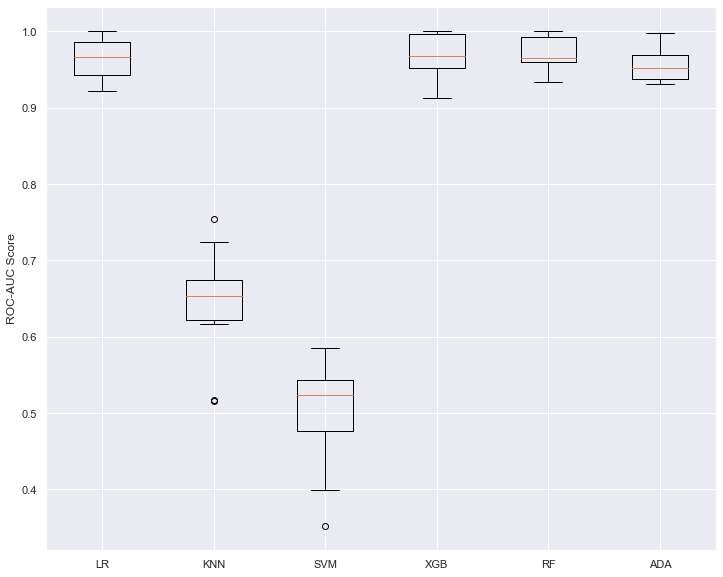

In [65]:
fig = plt.figure(figsize=(12,10))
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)   ####It seems that XGB and RF have outperformed but XGB has considerable SD as compared
                            #####to RF classifier

In [66]:
###For further improvement of performance, we could try with either oversampling or
###Synthetic Minority Oversampling Technique(SMOTE)
###Another thing is one could try RUSBoost or SMOTEBoost which is robust to sampling problems in datset

In [67]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
#import smote
from imblearn.under_sampling import RandomUnderSampler

In [68]:
def adaboost(X_train, X_test, y_train):
    model = AdaBoostClassifier(n_estimators=100, random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    return y_pred
# AdaBoost
y_baseline = adaboost(X_train, X_test, y_train)
# SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
y_smote = adaboost(X_train_sm, X_test, y_train_sm)
# RUS
X_full = X_train.copy()
X_full['Class'] = y_train
X_maj = X_full[X_full.Class==0]
X_min = X_full[X_full.Class==1]
X_maj_rus = resample(X_maj,replace=False,n_samples=len(X_min),random_state=44)
X_rus = pd.concat([X_maj_rus, X_min])
X_train_rus = X_rus.drop(['Class'], axis=1)
y_train_rus = X_rus.Class
y_rus = adaboost(X_train_rus, X_test, y_train_rus)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [69]:
from sklearn import metrics
import sklearn

In [70]:
a=sklearn.metrics.classification_report(y_test, y_baseline)
print(a)   ####Only Adaboost

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        75
           1       0.92      0.94      0.93        47

    accuracy                           0.94       122
   macro avg       0.94      0.94      0.94       122
weighted avg       0.94      0.94      0.94       122



In [71]:
a=sklearn.metrics.classification_report(y_test, y_smote)
print(a)   ####SMOTE&AdaBoost            ####As compared to logistic regression there's significant improvement by 8-10%

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        75
           1       0.92      0.96      0.94        47

    accuracy                           0.95       122
   macro avg       0.95      0.95      0.95       122
weighted avg       0.95      0.95      0.95       122



In [72]:
###"""
   # Implementation of Synthetic Minority Over-Sampling Technique (SMOTE).
   # SMOTE performs oversampling of the minority class by picking target 
  #  minority class samples and their nearest minority class neighbors and 
   # generating new samples that linearly combine features of each target 
   # sample with features of its selected minority class neighbors [1].  
####""""""

In [74]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=3,
                          n_informative=4, weights=[0.2, 0.3, 0.5],
                          random_state=0)
clf = RUSBoostClassifier(random_state=0)
clf.fit(X_train, y_train)  # doctest: +ELLIPSIS
RUSBoostClassifier(...)
clf.predict(X_test)  # doctest: +ELLIPSIS
#array([...])

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, 

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [75]:
b=sklearn.metrics.classification_report(y_test, clf.predict(X_test))
print(b)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        75
           1       0.88      0.96      0.92        47

    accuracy                           0.93       122
   macro avg       0.93      0.94      0.93       122
weighted avg       0.94      0.93      0.93       122

